### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('C:\\Users\\horta\\Desktop\\drugLibTrain_raw.tsv', delimiter='\t')


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [6]:
print(df.columns)


Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')


In [7]:
print(df.dtypes)


Unnamed: 0            int64
urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object


In [9]:
print(df.nunique())


Unnamed: 0           3107
urlDrugName           502
rating                 10
effectiveness           5
sideEffects             5
condition            1426
benefitsReview       3031
sideEffectsReview    2813
commentsReview       3046
dtype: int64


In [11]:
df_numeric = df.select_dtypes(include=[np.number])
df_categorical = df[['effectiveness', 'sideEffects']]
df_filtered = pd.concat([df_numeric, df_categorical], axis=1)


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [12]:
df_dummies = pd.get_dummies(df_filtered, columns=['effectiveness', 'sideEffects'])


In [13]:
df['effectiveness'] = df['effectiveness'].replace({"Ineffective":0,
                                                   "Marginally Effective":1,
                                                   "Moderately Effective":2,
                                                   "Considerably Effective":3,
                                                   "Highly Effective":4})

df['sideEffects'] = df['sideEffects'].replace({"No Side Effects":0,
                                               "Mild Side Effects":1,
                                               "Moderate Side Effects":2,
                                               "Severe Side Effects":3,
                                               "Extremely Severe Side Effects":4})


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [14]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [15]:
mejor_score = -1
mejor_k = 0

for k in range(2, 21):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_dummies)  
    prediccion = kmeans.predict(df_dummies)
    score = silhouette_score(df_dummies, prediccion)
    
    
    if score > mejor_score:
        mejor_score = score
        mejor_k = k

print("El mejor K es:", mejor_k, " con un silhouette score de:", mejor_score)


C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

El mejor K es: 2  con un silhouette score de: 0.6212857241706409


Mayor silhouette scores con K=2

In [19]:
kmeans_final = KMeans(n_clusters=2, random_state=42)
kmeans_final.fit(df_dummies)

prediccion_final = kmeans_final.predict(df_dummies)

df['cluster'] = prediccion_final


C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Con el Elbow method comprobamos que k=2 sería la opción más adecuada

C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

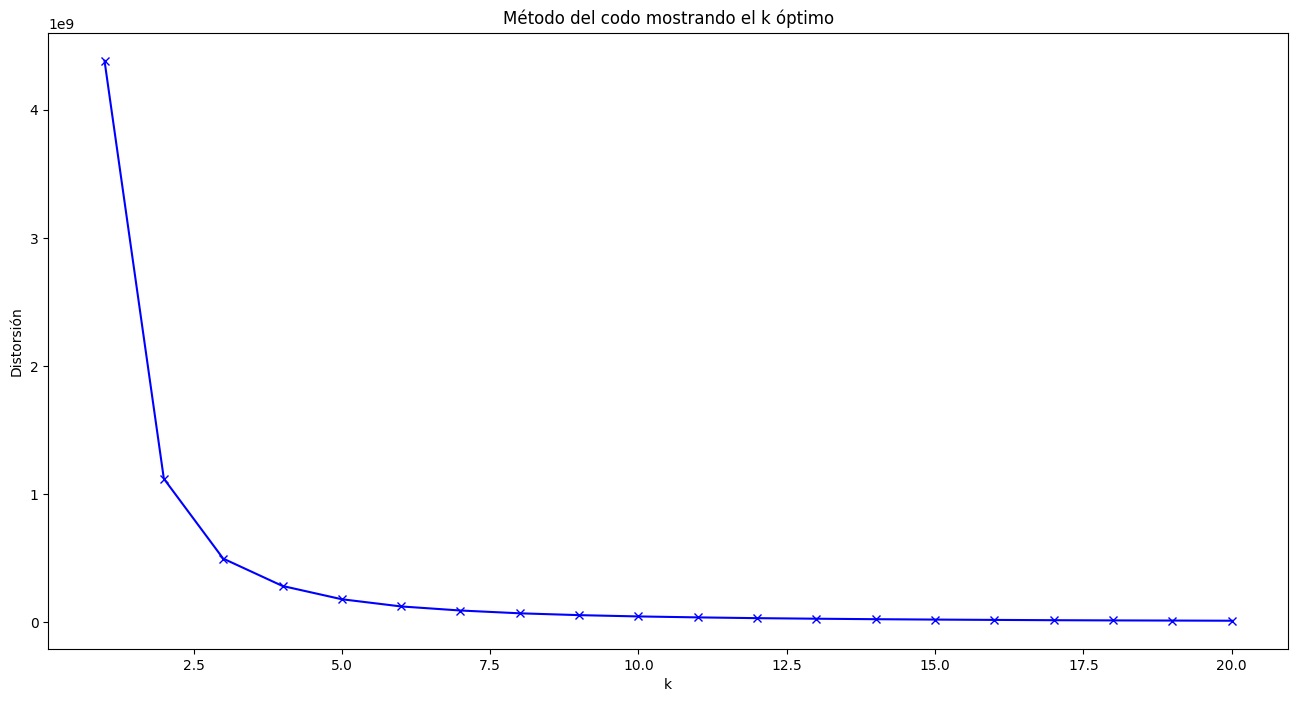

In [20]:
distortions = []
K = range(1,21) 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_dummies) 
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Método del codo mostrando el k óptimo')
plt.show()


#### Muestra en un gráfico de tartas la distribución de los distintos clusters

<Axes: ylabel='count'>

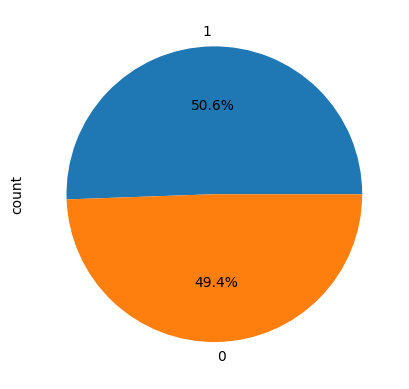

In [21]:
df['cluster'].value_counts().plot.pie(autopct="%.1f%%")


<AxesSubplot:ylabel='Cluster'>

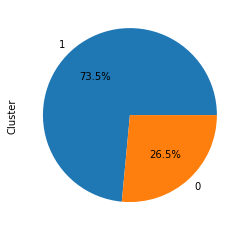

In [49]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")